<a href="https://colab.research.google.com/github/polaroidz/statistics/blob/master/1_Infer%C3%AAncia_para_M%C3%A9dia_de_Popula%C3%A7%C3%A3o_%C3%9Anica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferência para Média de População Única

Notebook para demonstrar como realizar um teste de hipótese em uma observação de média de uma população única.

**Objetivos:**

1. Simular amostra com base em parâmetros fornecidos;
2. Construir C.I. e fazer HT na amostra e nos dados teóreticos e comparar como os resultados se diferem;
3. Sugerir o melhor tamanho de amostra para se obter um intervalo confiável e um resultado estatistícamente significante;


In [0]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

np.random.seed(seed=42)

%matplotlib inline

## Simulação da Amostra

A amostra gerada será baseada numa distribuição normal, que deve ser condição dos Testes de Hipóteses que iremos realizar posteriormente.

---

**Framework Matemática**

**1. Distribuição Normal**

É uma distribuição teórica de probabilidade que é simétrica ao redor da média $\mu$ e com variância $\sigma^2$. 

>$P(X) = \frac{1}{\sigma \sqrt{2 \pi}}\exp(-{\frac{1}{2}}{(\frac{x - \mu}{\sigma})^2}) $

**2. Central Limit Theorem (CLT)**

De acordo com esse teorema, dada uma distribuição de comportamento normal, é garatindo que 95% dos dados estejam localizados ao menos dois desvios padrão $\pm 2\sigma$ da média. 

Usaremos esse teorema para inferir intervalos de confiança e fazer testes de Hipóteses.

Média da Amostra Simulada: 102.51715140550621
Variância da Amostra Simulada: 51.184680121981195
Desvio Padrão da Amostra Simulada: 7.154346938888357


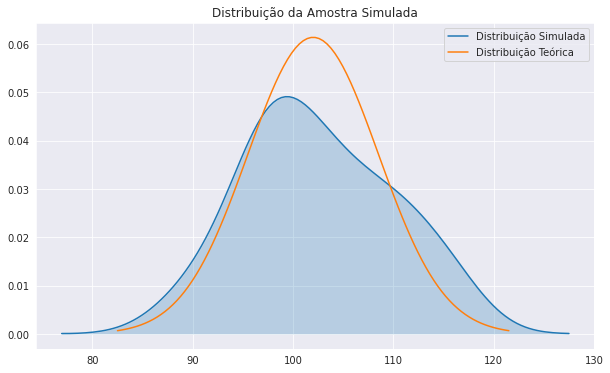

In [48]:
#@title Parâmetros da Amostra Simulada
n = 36 #@param 
mean = 102 #@param 
sd = 6.5 #@param

X = np.random.normal(mean, sd, n)

th_x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
th_y = st.norm.pdf(th_x, mean, sd)

print("Média da Amostra Simulada:", X.mean())
print("Variância da Amostra Simulada:", X.var())
print("Desvio Padrão da Amostra Simulada:", X.std())

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Distribuição da Amostra Simulada")
sns.kdeplot(data=X, shade=True, label="Distribuição Simulada")
sns.lineplot(x=th_x, y=th_y, label="Distribuição Teórica");

## Inferência - Etapas

Iremos realizar os seguintes cálculos para inferir sobre a média sugerida da população (pop_mean) através da construção de um **intervalo de confiança**, realização do **teste de hipótese** com a significância fornecida (alpha), calcular se o teste atingiu o desejado (**power**) e fornecer o **tamanho ideal da amostra** para corrigir o teste caso esse esteja "fraco".

**1. Encontrar o valor crítico z (z-score)** 

O valor critico é encontrado a partir de uma observação da curva teórica da distribuição normal onde o objetivo é encontrar o número de desvios padrão da média ideal para garantir o CLT.

Por exemplo, para um interval de confiança de 95% o valor critico seria:

>$\hat{z} = (1 - CI) / 2 = (1 - 0.95) / 2 = 0.025$

Se olharmos numa tabela de valores z:

>$z^\star = PPF(\hat{z}) = PPF(0.025) = 1.98$

Observações:

* PPF significa *Percent Point Function* e calcula o inverso do percentil fornecido.

* Dividimos por dois por que o teste é two-sided, ou seja, construimos o intervalo ao redor da média.

**2. Construção do Intervalo de Confiança**

O Intervalo de Confiança simboliza que das possiveis amostras da população, por exemplo, devem com 95% de certeza possuir uma média dentro desse intervalo. Nos ajuda a mensurar os resultados do teste de hipótese mas não infererem sobre a real média população.

>$\bar{x} \pm z^\star SE = \bar{x} \pm z^\star \frac{\sigma}{\sqrt{n}}$

**3. Calcular o z-score e o p-value**

O Z-score mede o quão extremo uma observação é em relação ao restante da população.

>$z = \frac{\bar{x} - \mu}{\sigma} = \frac{\bar{x} - x}{\sigma}$

Já o p-value é obtido a partir da densidade de probabilidade sob a curva de uma densidade de probabilidade normal $N(0,1)$ acima do valor do z-score, ou seja:

>$p = P(> |Z|)$

Quanto menor o valor mais improvável de que a amostra seja de uma população com a média sugerida ($Ho: \mu = x$).

**4. Conduzir o Teste de Hipótese**

Calculados os valores, rejeitaremos a hipótese nula ($Ho: \mu = x$) caso o valor seja menor do que a significância especificada $\alpha$. Assumindo a hipótese alternativa ($Ha: \mu \neq x$)




In [49]:
#@title Parâmetros da Inferência

pop_mean = 100 #@param
alpha = 0.05 #@param

ci = 1 - alpha
power = 0.8 #@param
beta = 1 - power

z_critical = st.norm.ppf((1 - ci) / 2)
z_critical = abs(z_critical)

SE = z_critical * (X.std() / np.sqrt(n))
ci_lower = X.mean() - SE
ci_upper = X.mean() + SE

print("RESULTADO OBTIDOS A PARTIR DA AMOSTRA GERADA")

print("Intervalo de Confiança Desejado:", ci * 100, "%")
print("Valor Crítico Adotado:", z_critical)
print("Margem de Erro:", SE)
print("Intervalo de Confiança: ({:.3f},{:.3f})".format(ci_lower, ci_upper))

sigma = X.std() / np.sqrt(n)

z_score = (pop_mean - X.mean()) / sigma
z_score = abs(z_score)

p_value = st.norm.pdf(z_score)

print("-----")

print("Hipóteses:")
print("Ho: mu =", pop_mean)
print("Ha: mu !=", pop_mean)
print("Z-score =", z_score)
print("p-value =", p_value)

Ho_rejected = p_value < alpha

print("Decisão:")
if Ho_rejected:
  print("Ho rejeitada em favor da Ha.")
else:
  print("Não há evidências suficientes contra a Ho.")



RESULTADO OBTIDOS A PARTIR DA AMOSTRA GERADA
Intervalo de Confiança Desejado: 95.0 %
Valor Crítico Adotado: 1.959963984540054
Margem de Erro: 2.3370437221875937
Intervalo de Confiança: (100.180,104.854)
-----
Hipóteses:
Ho: mu = 100
Ha: mu != 100
Z-score = 2.1110114678592824
p-value = 0.042975579555812646
Decisão:
Ho rejeitada em favor da Ha.


## Interpretando os Resultados

Tanto a hipótese nula ($Ho$) como a hipótese alternativa ($Ha$) descrita pela observação feita na amostra seguem uma distribuição normal, sendo a nula $N( z^\star, SE)$ e a alternativa $N(z, SE)$. Dessa forma podemos visualizar como as duas distribuições se comparam lado a lado.

Note, se o valor do seu z-score for muito alto os centros das distribuições ficarão muito distantes e quase não haverá sobreposição entre elas, uma vez que a $Ho$ foi certamente rejeitada.


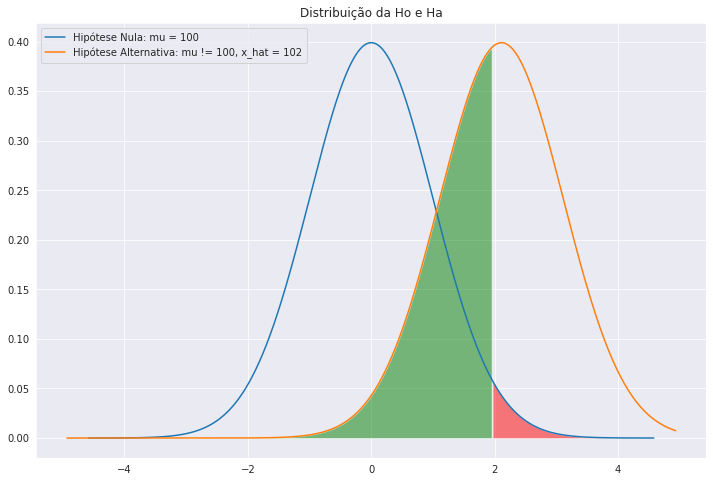

In [62]:
ho_x = np.linspace(-z_critical*SE, z_critical*SE, 1000)
ho_y = st.norm.pdf(ho_x, 0, 1)

ha_x = np.linspace(-z_score*SE, z_score*SE, 1000)
ha_y = st.norm.pdf(ha_x, z_score, 1)

plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
plt.title("Distribuição da Ho e Ha")

ax_ho = sns.lineplot(x=ho_x, y=ho_y, label="Hipótese Nula: mu = {}".format(pop_mean));
line = ax_ho.get_lines()[-1]
_x, _y = line.get_data()
mask = _x > z_critical
_x, _y = _x[mask], _y[mask]
ax_ho.fill_between(_x, y1=_y, alpha=0.5, facecolor='red')

ax_ha = sns.lineplot(x=ha_x, y=ha_y, label="Hipótese Alternativa: mu != {}, x_hat = {}".format(pop_mean, mean))
line = ax_ho.get_lines()[-1]
_x, _y = line.get_data()
mask = _x < z_critical
_x, _y = _x[mask], _y[mask]
ax_ho.fill_between(_x, y1=_y, alpha=0.5, facecolor='green')

plt.show();

A **região em vermelho** representa os o p-value, ou seja, $P(>|Z|)$ calculado anteriormente. E sua densidade depende da significância $\alpha$ adotada, quando menor seu valor, menor a região sombreada. 

Outra interpretação dessa região é a que ele representa a probabilidade de cometer um erro de decisão do **Tipo I**, que significa rejeitar a hipótese nula sendo ela verdadeira. Ou seja:

>$P(\text{Type I Error} | \text{Ho é verdadeira}) = \alpha$

Já a **região em verde** representa a probabilidade de cometer um erro de decisão do **Tipo II** em que o teste falha em rejeitar a hipótese nula sendo ela falsa.

>$P(\text{Type II Error} | \text{Ho é falsa}) = \beta$

Esse tipo de análise é chamada de Matriz de Confusão e há várias métricas envolvidas, porém, o mais importante é que essas taxas de erros são **inversamente proporcionais** e você nunca obterá um teste livre de erros, mas você pode optar em minimizar um dos dois, dependendo da criticidade de cometê-los.

<img src="https://wikieducator.org/images/e/e0/Type1TypeIIErrors.png" />


### Poder do Teste

O Poder do teste, isso é, a capacidade de do teste de corretamente rejeitar Ho, pode ser calculado como:

>$\text{Power} = 1 - \beta$

Onde $\beta$ é a região verde no gráfico. No geral queremos uma significância $\alpha \leq 0.10$ e um $\beta \leq 0.20$, ou seja, um $\text{Power} \geq 0.80$
